# (1) PRAKTIKUM CLUSTERING

## NAMA:Gishelawati

## NIM:10319046

***Catatan:***
1. Praktikum bersifat individual, namun berdiskusi secukupnya di dalam grup masing-masing
2. **Laporan final dalam format PDF** sebagai hasil konversi Notebook ke PDF dan disubmit di edunex. Bila ada slot informasi yang dapat dientry di edunex, tuliskan tautan ke Google Colab Notebook tersebut.

## Prinsip dasar (secara intuitif)
1. **Pilih** (secara acak untuk loop pertama; tidak perlu dari dataset) atau **hitung** (mulai dari loop kedua) sebanyak *K* titik-titik pusat cluster
2. Masukkan setiap titik dataset **hanya** ke salah satu cluster berdasarkan kriteria jarak terdekat ke titik-titik pusat cluster
3. Catat pergeseran setiap titik pusat cluster (mulai dari loop kedua)
4. Ulangi hingga konvergen

## Potensi masalah pada nilai awal centroid yang acak
1. Inisialisasi centroid acak tidak selamanya membawa sukses
2. Pada praktikum ini akan dicoba langsung pakai KMeans++ sebagai solusi yang ditawarkan Scikit Learn

## Metode siku (Elbow) untuk memilih jumlah cluster yang tepat
**Within Cluster Sum of Squares** (**WCSS**, atau istilah lainnya adalah **inersia**) adalah jumlah kuadrat jarak setiap titik data ke cluster terdekat. WCSS pada awalnya bernilai sangat besar dan dapat terus mengecil dengan semakin bertambahnya nilai parameter jumlah cluster. Dalam plot, seringkali terlihat penurunan ini sangat signifikan serupa tekukan siku, dan setelahnya nilai WCSS terus menurun secara melandai menuju nilai 0. Sifat seperti ini memungkinkan kita untuk memutuskan bahwa pada titik siku tersebut peningkatan jumlah cluster tidak lagi menurunkan nilai WCSS secara signifikan. Di titik siku itulah titik ideal jumlah cluster dapat dipilih.

__Dalam perspektif kalkulus: jumlah cluster ideal diperoleh dengan memaksimalkan turunan kedua dari WCSS__

### Perhatian:
Pada contoh kasus di bawah ini, akan dipelajari clustering pelanggan mall berdasarkan variabel ***penghasilan tahunan*** (indeks fitur ke-3) vs ***skor pengeluaran*** (indeks fitur ke-4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values
# fitur 3 untuk penghasilan tahunan, dan fitur 4 untuk skor pengeluaran

# Cek tampilan beberapa baris atas dataframe
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Di sini kita akan menggunakan k-means++

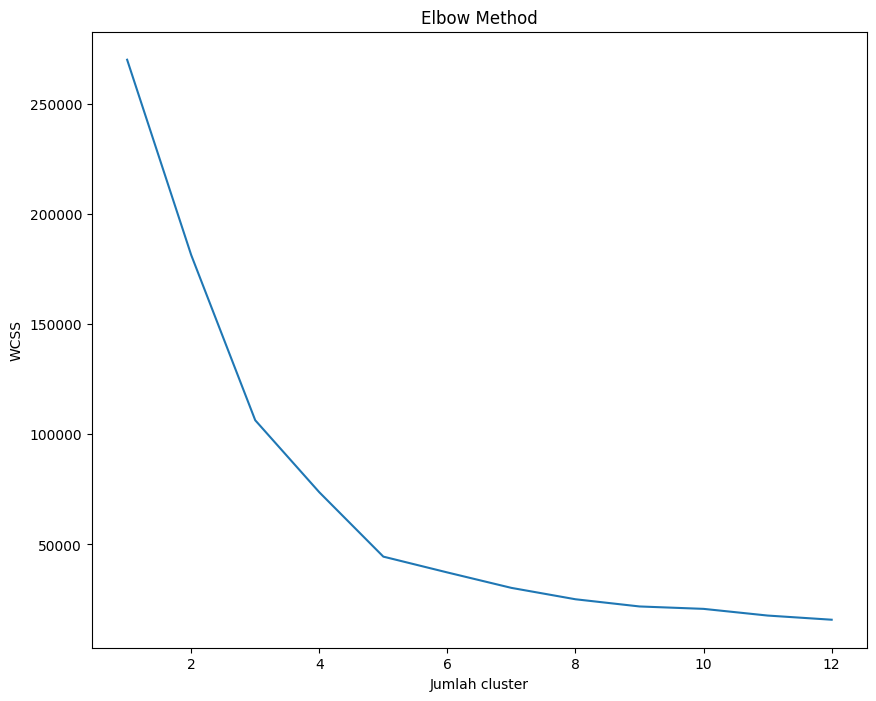

In [ ]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 13): #cek jumlah kluster
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(X)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 13), WCSS)
plt.title('Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Jumlah cluster')
plt.show()

#### Berdasarkan titik siku yang tampak di plot, berapakah jumlah cluster yang disarankan?
*(Jawab dan tulis di sel ini: n_clusters = 5)*

Hal ini karena 5 merupakan titik belok

In [ ]:
clf = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(X)

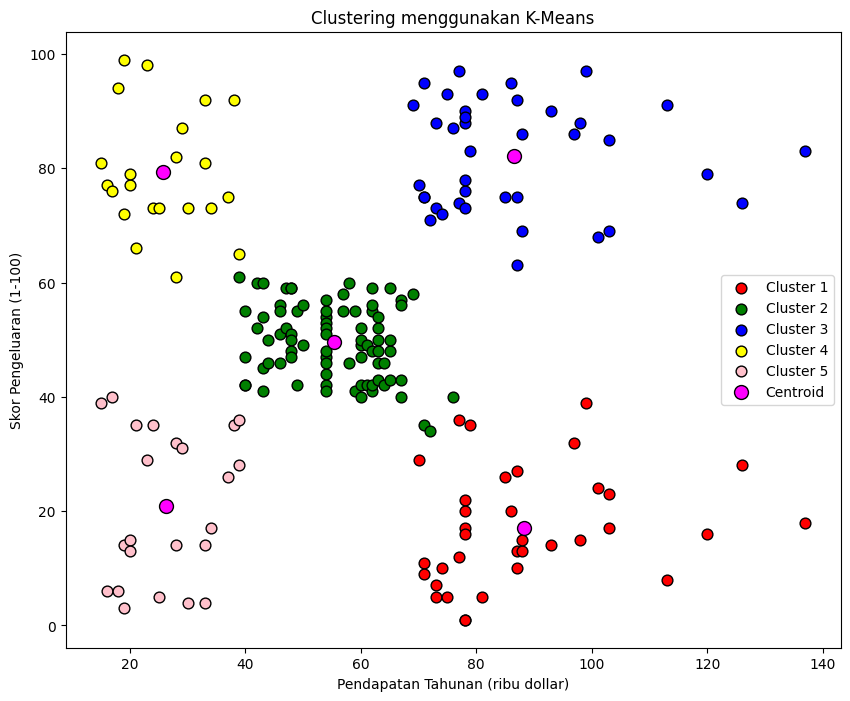

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='blue', s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='pink', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clustering menggunakan K-Means')
plt.xlabel('Pendapatan Tahunan (ribu dollar)')
plt.ylabel('Skor Pengeluaran (1-100)')
plt.show()

### Tugas:

Coba Anda temukan ide lain untuk clustering selain dari penghasilan tahunan vs skor pengeluaran. Kerjakan secara lengkap seperti contoh latihan di atas.

Umur (indeks fitur ke-2) vs penghasilan tahunan (indeks fitur ke-3)

In [ ]:
Y = df.iloc[:, [2, 3]].values
# fitur 3 untuk penghasilan tahunan, dan fitur 2 untuk umur

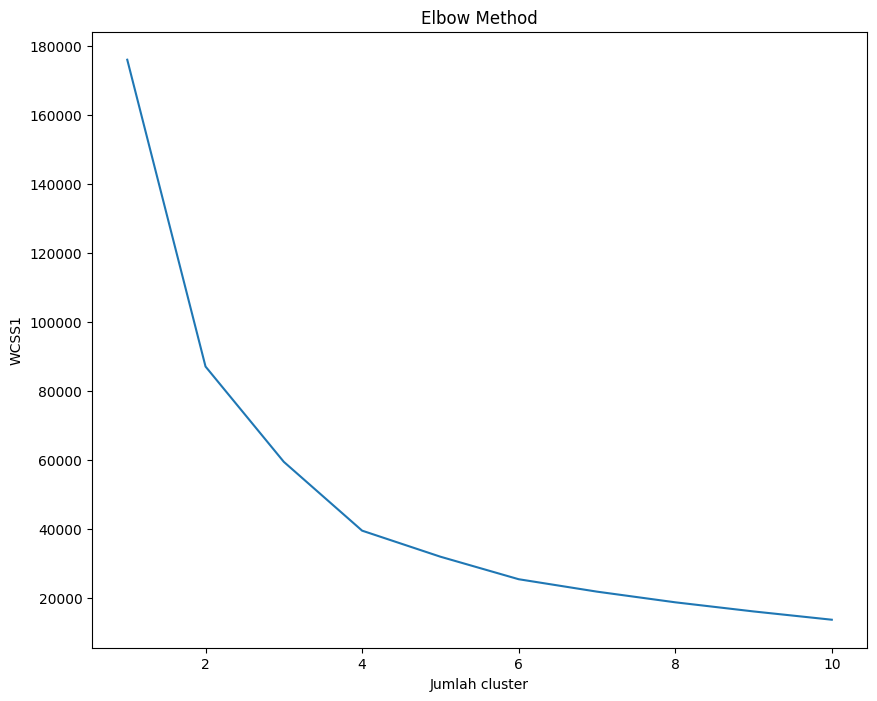

In [ ]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(10, 8))
WCSS1 = []
for i in range(1, 11):
    clf1 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf1.fit(Y)
    WCSS1.append(clf1.inertia_) # inertia is another name for WCSS1

plt.plot(range(1, 11), WCSS1)
plt.title('Elbow Method')
plt.ylabel('WCSS1')
plt.xlabel('Jumlah cluster')
plt.show()

In [ ]:
#n_clusters = 4, Hal ini karena 4 merupakan titik belok
clf1 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf1.fit_predict(Y)

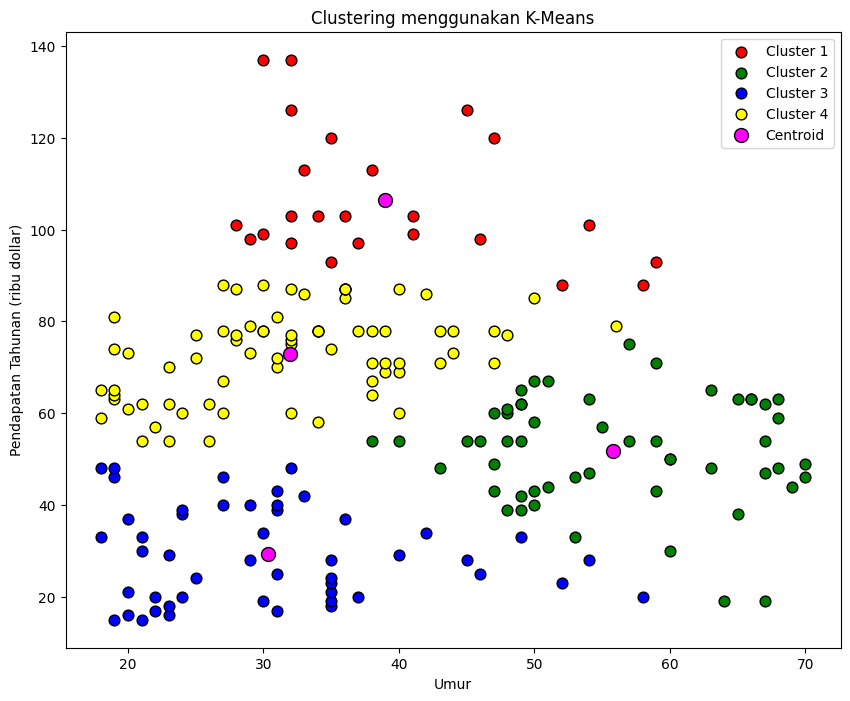

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], color='blue', s=60, label='Cluster 3', edgecolors='black')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')

# cluster centres
plt.scatter(clf1.cluster_centers_[:, 0], clf1.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clustering menggunakan K-Means')
plt.xlabel('Umur')
plt.ylabel('Pendapatan Tahunan (ribu dollar)')
plt.show()

Umur (indeks fitur ke-2) vs skor pengeluaran (indeks fitur ke-4)

In [ ]:
Z = df.iloc[:, [2, 4]].values
# fitur 4 untuk skor pengeluaran, dan fitur 2 untuk umur

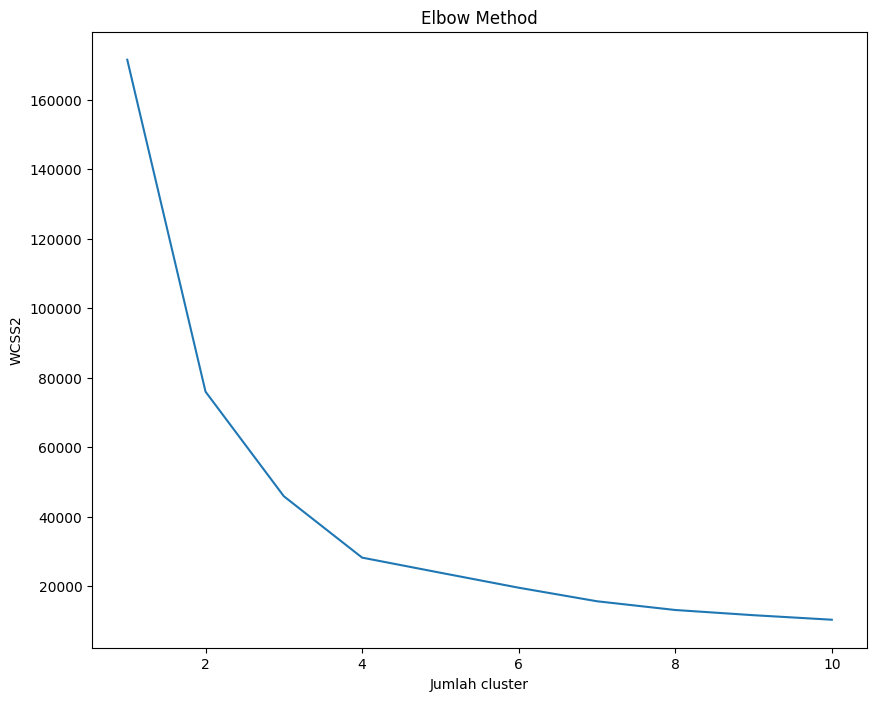

In [ ]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(10, 8))
WCSS2 = []
for i in range(1, 11):
    clf1 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf1.fit(Z)
    WCSS2.append(clf1.inertia_) # inertia is another name for WCSS2

plt.plot(range(1, 11), WCSS2)
plt.title('Elbow Method')
plt.ylabel('WCSS2')
plt.xlabel('Jumlah cluster')
plt.show()

In [ ]:
#n_clusters = 4, Hal ini karena 4 merupakan titik belok
clf1 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf1.fit_predict(Z)

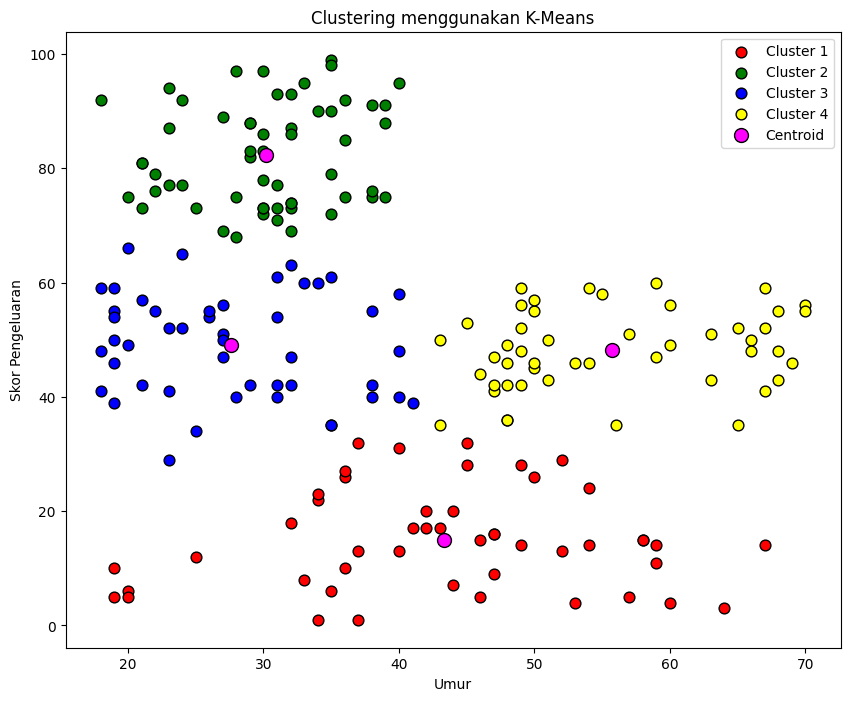

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], color='blue', s=60, label='Cluster 3', edgecolors='black')
plt.scatter(Z[y_kmeans == 3, 0], Z[y_kmeans == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')

# cluster centres
plt.scatter(clf1.cluster_centers_[:, 0], clf1.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clustering menggunakan K-Means')
plt.xlabel('Umur')
plt.ylabel('Skor Pengeluaran')
plt.show()